## Input and Visualize wave

In [2]:
!pip install librosa

     |████████████████████████████████| 184kB 3.7MB/s eta 0:00:01
     |████████████████████████████████| 378kB 10.0MB/s eta 0:00:01
     |████████████████████████████████| 307kB 4.7MB/s eta 0:00:01
     |████████████████████████████████| 327kB 12.2MB/s eta 0:00:01
     |████████████████████████████████| 614kB 19.2MB/s eta 0:00:01
     |████████████████████████████████| 61kB 11.8MB/s eta 0:00:01
  Created wheel for librosa: filename=librosa-0.8.0-cp37-none-any.whl size=201376 sha256=ce4ed8c2bf0f341b7afc081d476592a2c956d2428316fcd0330eaffd506f9f0b
  Stored in directory: /Users/nishu/Library/Caches/pip/wheels/ee/10/1e/382bb4369e189938d5c02e06d10c651817da8d485bfd1647c9
  Created wheel for audioread: filename=audioread-2.1.9-cp37-none-any.whl size=23144 sha256=6015d91d8b8bf0a4445258d367e0e71904a52285ccb719745dc8688300812a90
  Stored in directory: /Users/nishu/Library/Caches/pip/wheels/6d/55/fc/0d9cb2a5a52cc24d86cfcd5db4d40f448a43b9a6046c019fc1
  Created wheel for resampy: filename=resampy-

In [6]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

FIG_SIZE = (15,10)

file = "PinkPanther30.wav"

# load audio file with Librosa
signal, sample_rate = librosa.load(file, sr=22050)

In [14]:
len(signal), max(signal), min(signal)

(661500, 0.2684021, -0.22109985)

Text(0.5, 1.0, 'Waveform')

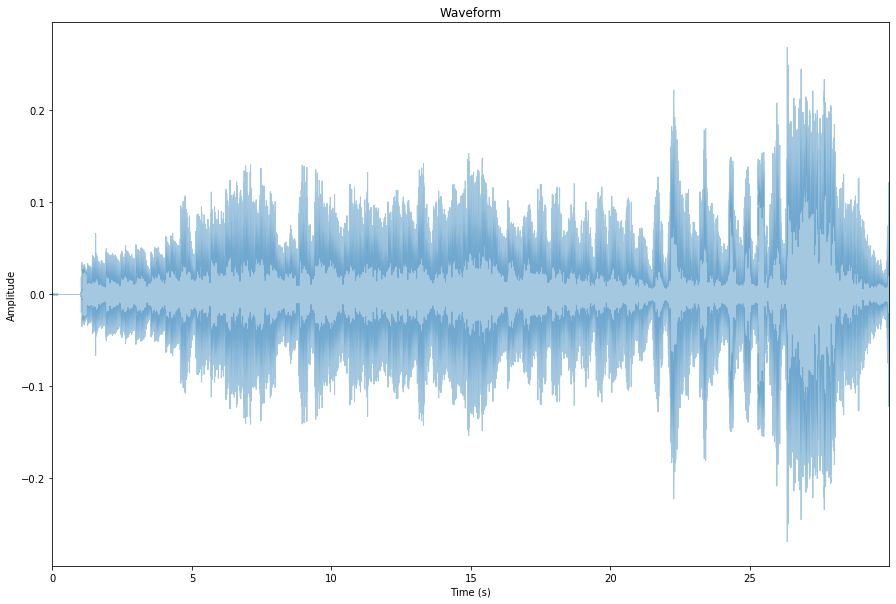

In [15]:
# WAVEFORM
# display waveform
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")


## FFT

Text(0.5, 1.0, 'Power spectrum')

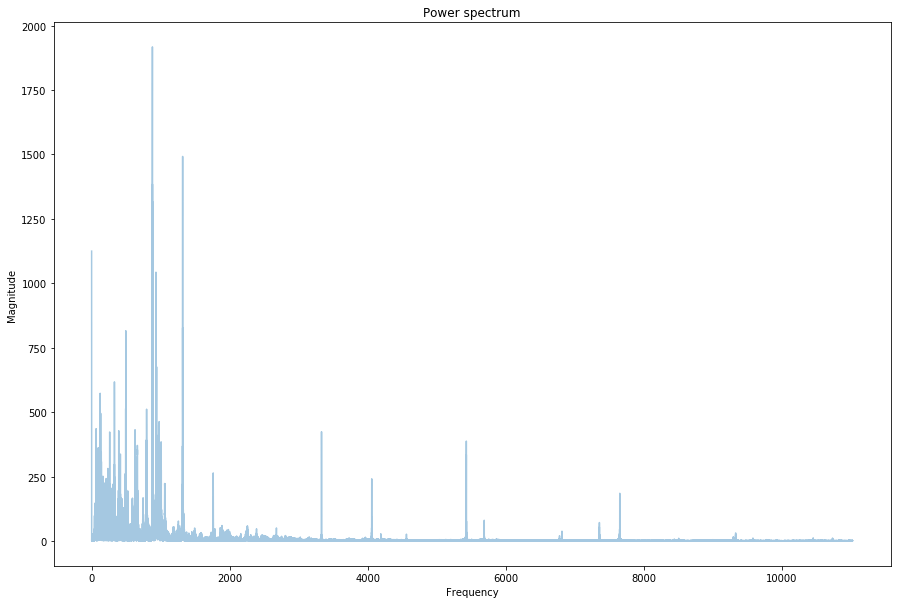

In [28]:
# FFT -> power spectrum
# perform Fourier transform
fft = np.fft.fft(signal)

# calculate abs values on complex numbers to get magnitude
spectrum = np.abs(fft)

# create frequency variable
f = np.linspace(0, sample_rate, len(spectrum))

# take half of the spectrum and frequency
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]

# plot spectrum
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f,left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [21]:
fft[0:10], spectrum[0:10]

(array([-1124.97113037 +0.j        ,    37.99793115 -8.21722404j,
           39.16844596-15.50374222j,    41.23425391-17.49106633j,
           38.67956193-18.80649284j,    38.08165345-20.00395614j,
           35.63220037-20.20914621j,    31.57679025-20.95206414j,
           24.6983272 -23.06407659j,    21.12157428-25.56150948j]),
 array([1124.97113037,   38.87628509,   42.12520839,   44.79063626,
          43.00921627,   43.01593415,   40.96417085,   37.89568148,
          33.7928838 ,   33.15888519]))

In [23]:
# abs value of complex number a+bj will be sqrt(a^2+b^2)
np.sqrt((39.16844596**2)+(15.50374222**2))

42.12520838815698

In [26]:
f = np.linspace(0, sample_rate, len(spectrum))
max(f), min(f)

(22050.0, 0.0)

## STFT

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

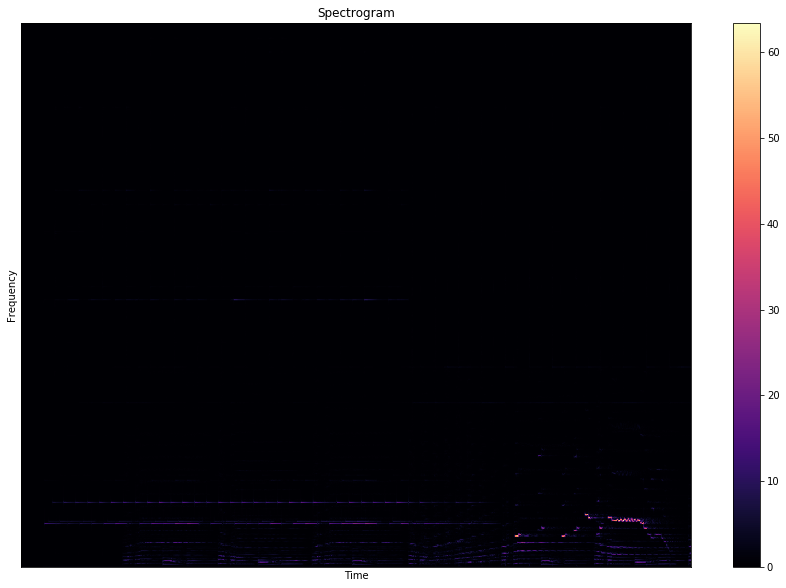

In [29]:
# STFT -> spectrogram
hop_length = 512 # in num. of samples, how many samples to skip when sliding the frame window
n_fft = 2048 # window in num. of samples, no. of samples in a window

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sample_rate # how many seconds to hop when sliding frame from one to another
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# display spectrogram
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

In [34]:
hop_length_duration, n_fft_duration, len(signal)

(0.023219954648526078, 0.09287981859410431, 661500)

In [42]:
len(signal)/512, len(stft), len(stft[1])

(1291.9921875, 1025, 1292)

In [43]:
stft

array([[ 5.0509661e-01+0.0000000e+00j,  5.0579238e-01+0.0000000e+00j,
         5.0452173e-01+0.0000000e+00j, ...,
        -1.6722673e+00+0.0000000e+00j, -1.8257302e+00+0.0000000e+00j,
        -1.2478362e+00+0.0000000e+00j],
       [-2.5346854e-01-2.9002408e-18j, -2.5203085e-01+7.1700005e-04j,
        -2.5402698e-01-2.0329899e-03j, ...,
         7.2290546e-01-1.6004739e-02j,  9.2026752e-01-1.3197795e-01j,
         1.0143281e+00+7.8410929e-01j],
       [ 7.0473680e-04+1.5022552e-20j, -2.6570593e-03+2.8478220e-04j,
         4.8271152e-03+1.7285191e-03j, ...,
        -1.8336678e-01+2.1571344e-01j,  7.2526947e-02+3.1033713e-01j,
        -7.6478601e-01-9.4282599e-03j],
       ...,
       [-7.0119696e-04+5.1860823e-19j,  2.3583104e-04+1.4162788e-04j,
         4.4320858e-04-3.0704818e-04j, ...,
         5.2620922e-03-1.2075959e-02j,  1.5565720e-03+7.3472946e-03j,
        -2.0168673e-03-4.4003199e-03j],
       [ 5.9123198e-04-2.7105054e-20j, -2.2282416e-04-5.1847566e-04j,
        -2.7767464e-04

In [44]:
print(len(spectrogram))# no. of frequency in each window frame, 
len(spectrogram[0]) # no. of total such frames
# So for each frame out of total 1292 frame, we got 1025 different frequency and magnitude corresponding to those frequencies

(1025, 1292)

Text(0.5, 1.0, 'Spectrogram (dB)')

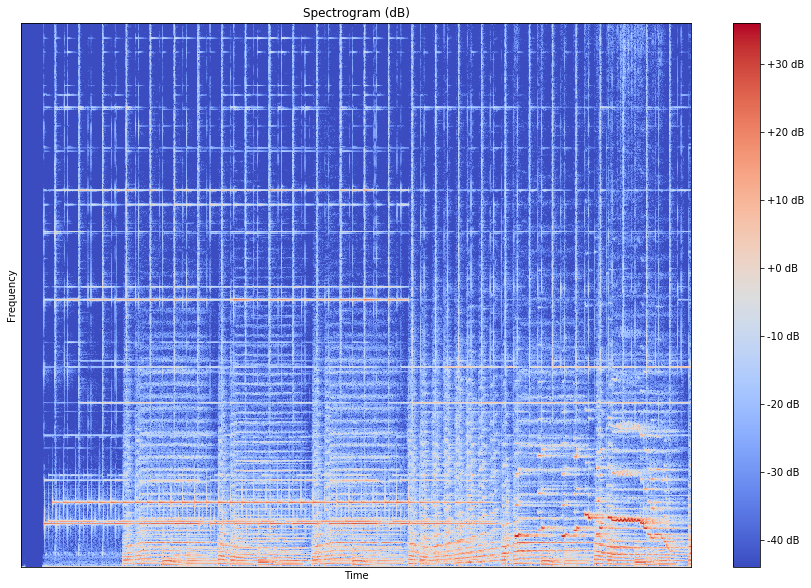

In [45]:
# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

## MFCCs

In [48]:
len(MFCCs), len(MFCCs[0]) # as there were 1025 frequencies there are 13 MFCC coefficients and 1292 different frames

(13, 1292)

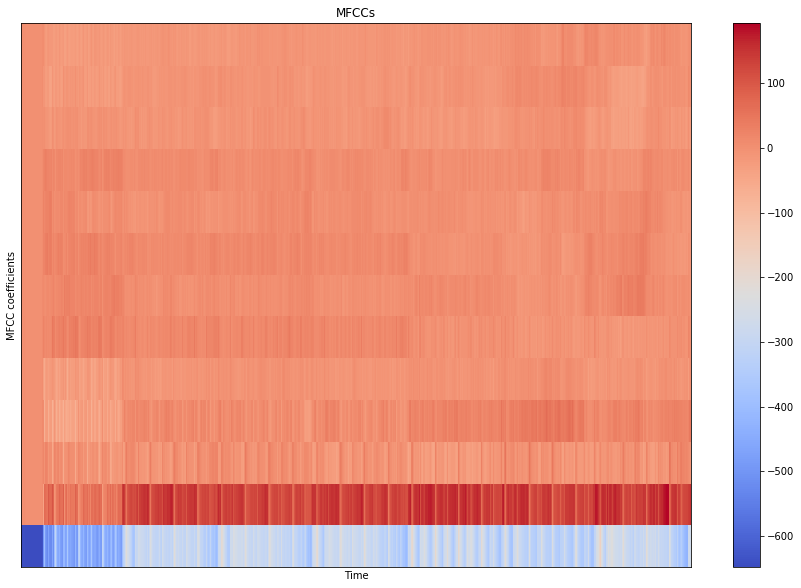

In [46]:
# MFCCs
# extract 13 MFCCs
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)

# display MFCCs
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")

# show plots
plt.show()
